# Import Packages

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, mutual_info_regression

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mercedes-benz-greener-manufacturing/train.csv.zip
/kaggle/input/mercedes-benz-greener-manufacturing/sample_submission.csv.zip
/kaggle/input/mercedes-benz-greener-manufacturing/test.csv.zip


# Import Data

Video Link: https://youtu.be/PpEDks6k88U

In [2]:
train = pd.read_csv('/kaggle/input/mercedes-benz-greener-manufacturing/train.csv.zip') 
test = pd.read_csv('/kaggle/input/mercedes-benz-greener-manufacturing/test.csv.zip') 

## Check Data

In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
train.describe(include=['object'])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [6]:
train.describe(include=['float64'])

,y
count,4209.000000
mean,100.669318
std,12.679381
min,72.110000
25%,90.820000
50%,99.150000
75%,109.010000
max,265.320000


# Treat Target Column Outliers

<AxesSubplot:>

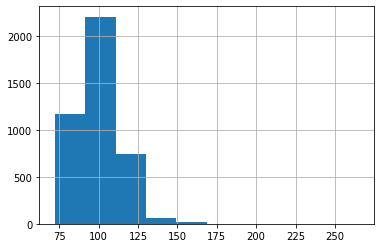

In [7]:
train['y'].hist(bins=10)

<AxesSubplot:>

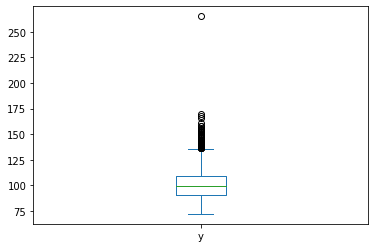

In [8]:
train['y'].plot.box()

In [13]:
c=(y_trail[y_trail > 250])
c.count

NameError: name 'y_trail' is not defined

In [ ]:
Q1 = train['y'].quantile(0.25)
Q3 = train['y'].quantile(0.75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(lower_whisker)
print(upper_whisker)

In [ ]:
outlier_index = train[(train.y > upper_whisker)].index
outlier_index

In [ ]:
#outlier_count = train[(train.y > upper_whisker)]
#outlier_count.count()

## Drop Outliers from Train

In [ ]:
#train = train.drop(outlier_index)

In [ ]:
#train.info()

## Divide Data into X and y

In [9]:
y = train['y']
X = train.drop(['y','ID'], axis = 1)
X_test = test.drop(['ID'], axis = 1)

## Train & Validation Split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)

## Get Categorical and Numerical Feature Names

In [11]:
numerical_features = X.select_dtypes(include = 'number').columns.values
numerical_features

array(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28',
       'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37',
       'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46',
       'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55',
       'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64',
       'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74',
       'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83',
       'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92',
       'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101',
       'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109',
       'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117',
       'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126',
       'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134',
       'X135',

In [12]:
categorical_features = X.select_dtypes(exclude = 'number').columns.values
categorical_features

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [ ]:
## Check if it works without .columns and .values
##categorical_t = X.select_dtypes(exclude = 'number').columns.values
##categorical_t

# Preprocessing

## Categorical Encoding

In [13]:
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value= np.NaN)
oe.fit(X_train[categorical_features])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=nan)

In [14]:
# transform Train
X_train[categorical_features] = oe.transform(X_train[categorical_features])

# transform Val
X_val[categorical_features] = oe.transform(X_val[categorical_features])

# transform Test
X_test[categorical_features] = oe.transform(X_test[categorical_features])

## Missing Value treatment

In [15]:
impute = SimpleImputer(strategy = 'median')
impute.fit(X_train)

SimpleImputer(strategy='median')

In [16]:
# transform Train
X_train = impute.transform(X_train)

# transform Val
X_val = impute.transform(X_val)

# transform Test
X_test = impute.transform(X_test)

## Transformation

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
# transform Train
X_train = scaler.transform(X_train)

# transform Val
X_val = scaler.transform(X_val)

# transform Test
X_test = scaler.transform(X_test)

## Select top Features

In [19]:
sel = SelectKBest(mutual_info_regression, k = 30)
sel.fit(X_train, y_train)

SelectKBest(k=30,
            score_func=<function mutual_info_regression at 0x7fdc66fd33b0>)

In [20]:
# transform Train
X_train = sel.transform(X_train)

# transform Val
X_val = sel.transform(X_val)

# transform Test
X_test = sel.transform(X_test)

# Build Model

In [21]:
pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.5/544.5 kB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 14.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 13

In [22]:
from pycaret.regression import *
s = setup(train, target = 'y')

,Description,Value
0,Session id,2077
1,Target,y
2,Target type,Regression
3,Data shape,"(4209, 366)"
4,Train data shape,"(2946, 366)"
5,Test data shape,"(1263, 366)"
6,Numeric features,369
7,Categorical features,8
8,Preprocess,True
9,Imputation type,simple


In [27]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,5.5428,76.4490,8.6274,0.5554,0.0763,0.0525,0.1930
lasso,Lasso Regression,5.5463,76.4971,8.6301,0.5551,0.0763,0.0526,0.1880
br,Bayesian Ridge,5.5490,76.5737,8.6332,0.5547,0.0764,0.0526,0.2680
omp,Orthogonal Matching Pursuit,5.6619,79.1988,8.7786,0.5396,0.0780,0.0537,0.2000
huber,Huber Regressor,5.1227,80.6071,8.8655,0.5301,0.0782,0.0473,0.4910
ridge,Ridge Regression,5.8101,81.7458,8.9259,0.5241,0.0795,0.0552,0.1950
lr,Linear Regression,5.9538,85.3395,9.1195,0.5031,0.0815,0.0567,0.2200
et,Extra Trees Regressor,6.0223,85.8802,9.1553,0.4996,0.0821,0.0580,3.9660
gbr,Gradient Boosting Regressor,6.6419,94.3100,9.6149,0.4480,0.0876,0.0650,1.0130
catboost,CatBoost Regressor,7.0585,100.8584,9.9600,0.4070,0.0910,0.0692,9.0720


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [28]:
print(best)

ElasticNet(random_state=2077)


In [29]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

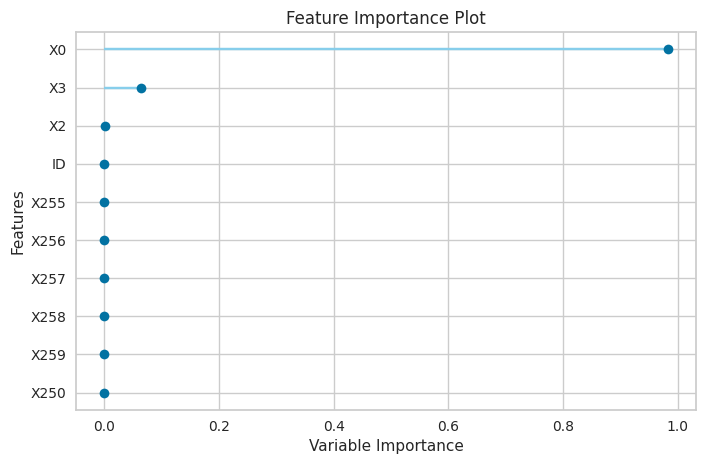

In [30]:
plot_model(best, plot = 'feature')

## Predict Y

In [31]:
predictions = predict_model(best, data=test)
predictions.head()

,ID,X0,X1,X2,X3,X4_d,X4_a,X4_c,X4_b,X5,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,Label
0,1.0,78.106183,101.859550,82.991296,96.521409,1.0,0.0,0.0,0.0,100.789331,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,79.824483
1,2.0,93.869587,99.928875,94.300036,102.754639,1.0,0.0,0.0,0.0,100.789331,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.925171
2,3.0,78.106183,101.859550,103.933445,96.521409,1.0,0.0,0.0,0.0,100.789331,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,79.837361
3,4.0,78.106183,100.416280,82.991296,96.521409,1.0,0.0,0.0,0.0,100.789331,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,79.823734
4,5.0,113.044927,101.549321,103.933445,102.239159,1.0,0.0,0.0,0.0,100.789331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.810950


In [44]:
predictions['ID']=predictions['ID'].astype(int)

# Submission 

In [45]:
submission_pycaret = pd.DataFrame({
    'ID' : predictions['ID'],
    'y' : predictions['Label']
})

submission_pycaret.head()

,ID,y
0,1,79.824483
1,2,94.925171
2,3,79.837361
3,4,79.823734
4,5,113.810950


## Export 

In [46]:
submission_pycaret.to_csv('Submission_Pycaret_F30.csv', index = False)